<a href="https://colab.research.google.com/github/ArulselvanMadhavan/csc746/blob/master/2_RandomForest_Cleveland_CSC508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to the Random Forest Python Notebook!
In this notebook you will make a random forest. A random forest is a collection of random-ish decision trees. Most jargon in Machine Learning is just ugly, imo. But Random Forest sounds nice to me, a little poetic. I could imagine titling my album after random forests, if I were a singer-songrwriter. 

This notebook was created by Vaisakh Kusabhadran, Amisha Dhawan, Yuomi Zavaleta (all SFSU students) and Pleuni Pennings (SFSU bio professor).

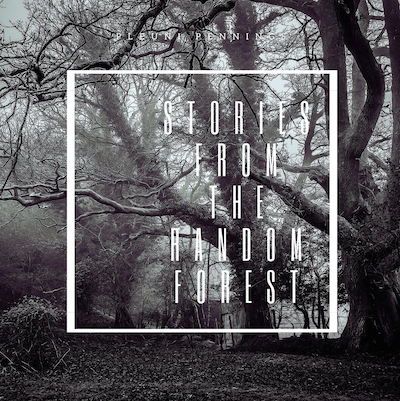

#Preparing libraries and data and dealing with missing data

Importing all the necessary libraries needed for processing

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Reading the dataset from the github repository

In [ ]:
columns = ["Age","Sex","Chest_pain_type","At_rest_bp","Cholesterol","Fast_blood_sug","Rest_ecg","Maxhr","Exer_angina","Oldpeak","Slope","Ca","Thal","Diag"]
cleveland_data = pd.read_csv('https://raw.githubusercontent.com/kusabhadranv/gSTARdataset/main/processed.cleveland.data',header=None, names=columns)
cleveland_data

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal,Diag
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Replacing '?' in the dataset with the median value for that column. 

In [ ]:
cleveland_data = cleveland_data.replace('?', np.nan)
cleveland_data['Thal'] = cleveland_data['Thal'].fillna(cleveland_data['Thal'].median())
cleveland_data['Ca'] = cleveland_data['Ca'].fillna(cleveland_data['Ca'].median())
(cleveland_data==np.nan).sum()

Age                0
Sex                0
Chest_pain_type    0
At_rest_bp         0
Cholesterol        0
Fast_blood_sug     0
Rest_ecg           0
Maxhr              0
Exer_angina        0
Oldpeak            0
Slope              0
Ca                 0
Thal               0
Diag               0
dtype: int64

Checking the dimensions of the dataset

In [ ]:
print("The dimension of the table is:",cleveland_data.shape)

The dimension of the table is: (303, 14)


# Splitting labels from feautures and training from test data
Seperating out the labels (which is what we want to predict, the "Diag" column) from the rest of the dataset (the features). 

Converting the labels to binary values so that the model is trained just to predict the presence/absence of heart disease. 

In [ ]:
labels = np.array(cleveland_data["Diag"])
labels = np.where(labels >= 1,1,0)
labels

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

Dropping the labels from the dataset. Now since the label has got removed, we can use this dataset to train the model

In [ ]:
features = cleveland_data.drop(columns='Diag')
features

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


Converting the dataframe into an Numpy array as the algorithm requires a Numpy array for processing

In [ ]:
features = np.array(features)

* Seperating the training and testing data. <br>
* test_size=0.3 Gives the propotion of the dataset to include in the test set. 0.3 represents 30%. <br>
* random_state = 1 Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order. More details - https://scikit-learn.org/stable/glossary.html#term-random_state

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
train_labels

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0])

In [ ]:
test_labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

#Training the model using test set.  

You will see here that actually training the model is super easy and fast. We just need to decide how many random trees we'll make. 
We use random state = 42 so that we can all get exactly the same results, but if you change the random state, you'll get slightly different results. It's called random for a reason! 

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, max_features = "auto", bootstrap = True, random_state = 42)
rf.fit(train_features, train_labels);

#Predicting and looking at the accuracy of the model

We predict using the trained model (rf). 

In [ ]:
predictions = rf.predict(test_features)
predictions

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

Converting the prediction also into binary values

We use the confusion matrix to visualize how well our model did. 

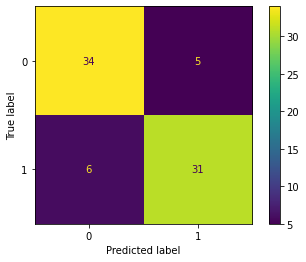

In [ ]:
metrics.confusion_matrix(test_labels, predictions)
metrics.plot_confusion_matrix(rf, test_features, test_labels)

Calculating the accuracy

In [ ]:
acc = round(100*metrics.accuracy_score(predictions, test_labels),2)
print("Accuracy:",acc,"%")

Accuracy: 85.53 %


#Assignment
1. How does the accuracy of the random forest classifyer compare to the decision tree? 
2. If you only made 2 or 4 or 10 random trees in your random forest, would that change your accuracy? Try it out! 

#New: looking at the importance of the features

Visualizing your results is always an important part of any data science project. Now that we have a random forest based on 1000 random trees, we cannot easily visualize the trees like we did for the decision tree. But we can visualize the feauture importance. I've seen this kind of plot in published articles. I like it because it helps us understand which feautures are most important for making predictions. 

[0.09359969 0.04243293 0.12195644 0.07935762 0.08087072 0.00814534
 0.02044649 0.11524036 0.05901268 0.10381362 0.04582646 0.1281699
 0.10112772]


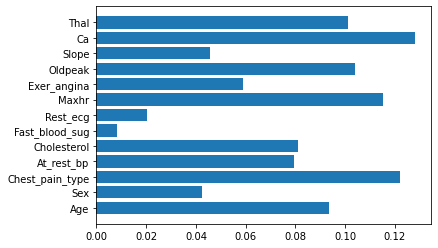

In [ ]:
importance = rf.feature_importances_
# summarize feature importance
print(importance)
from matplotlib import pyplot
pyplot.barh([x for x in range(len(importance))], importance, tick_label = columns[:-1], )
pyplot.show()